## Метод градиентного спуска

In [1]:
import numpy as np
import matplotlib.pyplot as plt

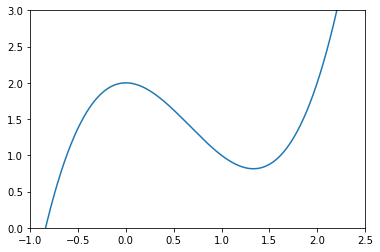

In [2]:
f = lambda x: x**3-2*x**2+2
x = np.linspace(-1,2.5,1000)#возвращает одномерный массив из указанного количества элементов, значения которых равномерно распределенны внутри заданного интервала
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

In [21]:
lr = 0.08 #скорость
points = [2]
n_epochs = 15 

In [22]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [23]:
y_points = [f(p) for p in points]

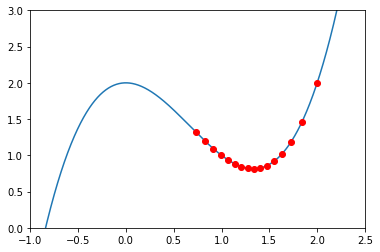

In [27]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

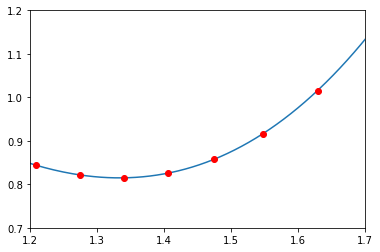

In [28]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([1.2,1.7])
plt.ylim([0.7,1.2])
plt.show()

### Метод nesterov momentum

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), f(x).reshape(-1,1),random_state=1)

In [71]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(max_iter=500, nesterovs_momentum=True,)
regr.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(max_iter=500)

In [72]:
regr.score(X_test, y_test)

0.970633033960462

### Метод rmsprop

### Классификация Ирисов

In [167]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [168]:
iris = datasets.load_iris()

In [169]:
for key in iris.keys():
    print( key )

data
target
frame
target_names
DESCR
feature_names
filename


In [170]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [171]:
import pandas as pd
df = pd.DataFrame(iris.data,  columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [172]:
df['target'] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [173]:
df = df[df['target']!=0]

In [174]:
#взять только два цветка - Iris Versicolor и Iris Virginica
#y = iris.target_names[1:]
y = df['target']

In [175]:
del df['target']

In [176]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [177]:
X = df

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Метод nesterov momentum

In [190]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [197]:
regr2 = MLPClassifier(max_iter=1000, nesterovs_momentum=True,random_state=1)

In [198]:
cross_val_score(regr2, X, y, cv = 5,)

array([1.  , 1.  , 0.95, 0.9 , 1.  ])

In [199]:
regr2.fit(X_train,y_train).score(X_test, y_test)

0.9